<a href="https://colab.research.google.com/github/CSID-DGU/2020-2-OSSP1-WhatsUp-5/blob/master/model/dataEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd "/content/drive/Shareddrives/와썹_공개SW/GPT2_MNews"

/content/drive/Shareddrives/와썹_공개SW/GPT2_MNews


In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 256kB 13.3MB/s 
     |████████████████████████████████| 1.1MB 29.0MB/s 
     |████████████████████████████████| 675kB 60.0MB/s 
     |████████████████████████████████| 68.7MB 48kB/s 
     |████████████████████████████████| 3.8MB 18.8MB/s 
     |████████████████████████████████| 890kB 51.4MB/s 
  Created wheel for gluonnlp: filename=gluonnlp-0.9.1-cp36-cp36m-linux_x86_64.whl size=470061 sha256=30af179e2e574af83604854a6b1432191b48593da001d6f93ff7eddc90f32f25
  Stored in directory: /root/.cache/pip/wheels/af/60/16/1f8a40e68b85bd9bd7960e91830bca5e40cd113f3220b7e231
  Created wheel for kss: filename=kss-1.3.1-cp36-cp36m-linux_x86_64.whl size=251580 sha256=f959714db86346fd538648839a36694c7d100266a17b9d9bbf8ca64c7be4b497
  Stored in directory: /root/.cache/pip/wheels/8b/98/d1/53f75f89925cd95779824778725ee3fa36e7aa55ed26ad54a8
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=3f16530369e52d1c6332b4cb705808e30

In [ ]:
import numpy as np
import pandas as pd
import os
import re
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from transformers import BertTokenizer
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
np.random.seed(seed=0)

제목데이터

In [ ]:
DATA_IN_PATH = '/content/drive/Shareddrives/와썹_공개SW/crawling_DATA/edited_csv/TITLE/'
TRAIN_DATA_FILE = [
                   'g_health_title_edit.csv',
                   'health_chosun_title_edit.csv',
                   'medi_gate_title_edit.csv',
                   'medical_times_title_edit.csv',
                   'titles_remove_duple.csv'
                   ]

본문기사데이터

In [ ]:
DATA_IN_PATH = '../crawling_DATA/final_train/'

TRAIN_DATA_FILE = ['refined_whosaeng.csv',
                   'refined_medical_times_edit.csv',
                   'refined_medical_daily.csv',
                   'refined_medi_gate_edit.csv',
                   'refined_k-health.csv',
                   'refined_g_health_edit.csv',
                   'refined_health_chosun_edit1.csv',
                   'refined_health_chosun_edit2.csv',
                   'refined_health_chosun_edit3.csv',
                   'refined_health_chosun_edit4.csv',
                   'refined_docdoc.csv',
                   ]

#sents = [s[:-1] for s in open(DATA_IN_PATH + TRAIN_DATA_FILE).readlines()]

In [ ]:
DATA_IN_PATH = '../crawling_DATA/final_train/test/'

TRAIN_DATA_FILE = ['refined_health_chosun_1_600.csv',
                   'refined_g_health_600.csv',
                   'refined_docdoc_600.csv',
                   'refined_health_chosun_2_600.csv',
                   'refined_health_chosun_3_600.csv',
                   'refined_health_chosun_4_600.csv',
                   'refined_k-health_600.csv',
                   'refined_medi_gate_600.csv',
                   'refined_medical_daily_600.csv',
                   'refined_medical_times_600.csv',
                   'refined_whosaeng_600.csv'
                   ]

#sents = [s[:-1] for s in open(DATA_IN_PATH + TRAIN_DATA_FILE).readlines()]

데이터 로드

In [ ]:
test=[]
for datasets in TRAIN_DATA_FILE:
  f_med=open(DATA_IN_PATH+datasets,'r',encoding='utf-8')
  rdr=csv.reader(f_med)
  a
  for line in rdr:
    for s in line:
      print(s)
      test.append(s)

In [ ]:
train_set = pd.Series(test)
print('유일한 총 문장 수 : {}'.format(len(np.unique(train_set))))
print('반복해서 나타나는 문장의 수: {}'.format(np.sum(train_set.value_counts() > 1)))

유일한 총 문장 수 : 65174
반복해서 나타나는 문장의 수: 2


In [ ]:
print('중복 최대 개수: {}'.format(np.max(train_set.value_counts())))
print('중복 최소 개수: {}'.format(np.min(train_set.value_counts())))
print('중복 평균 개수: {:.2f}'.format(np.mean(train_set.value_counts())))
print('중복 표준편차: {:.2f}'.format(np.std(train_set.value_counts())))
print('중복 중간길이: {}'.format(np.median(train_set.value_counts())))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 25)))
print('제 3 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 75)))

중복 최대 개수: 2
중복 최소 개수: 1
중복 평균 개수: 1.00
중복 표준편차: 0.01
중복 중간길이: 1.0
제 1 사분위 중복: 1.0
제 3 사분위 중복: 1.0


In [ ]:
train_length = train_set.apply(len)

문장 길이 최대 값: 43367
문장 길이 최소 값: 601
문장 길이 평균 값: 1458.42
문장 길이 표준편차: 902.82
문장 길이 중간 값: 1216.5
문장 길이 제 1 사분위: 886.0
문장 길이 제 3 사분위: 1759.0


Text(0, 0.5, 'Probability')

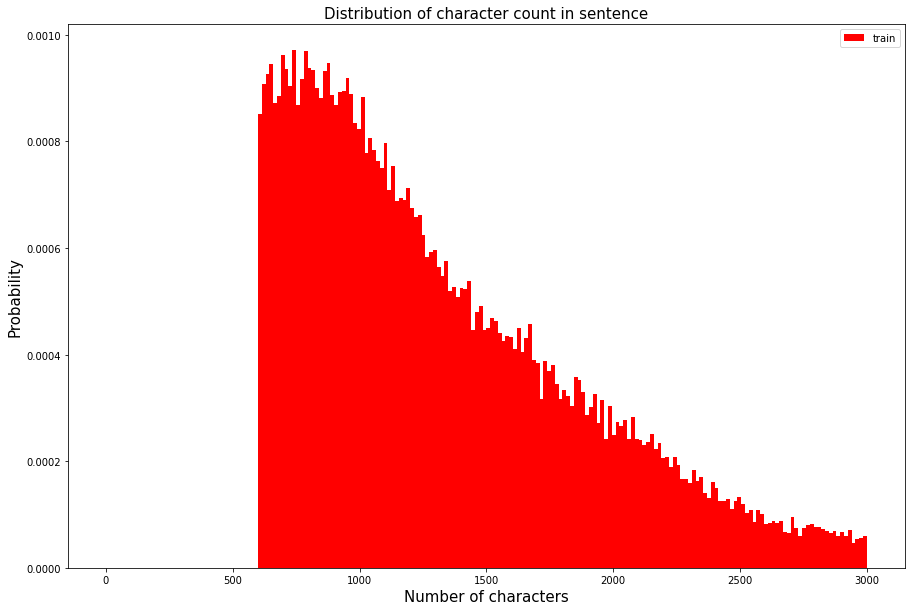

In [ ]:
print('문장 길이 최대 값: {}'.format(np.max(train_length)))
print('문장 길이 최소 값: {}'.format(np.min(train_length)))
print('문장 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('문장 길이 중간 값: {}'.format(np.median(train_length)))
print('문장 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('문장 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))


plt.figure(figsize=(15, 10))
plt.hist(train_length, bins=200, range=[0,3000], facecolor='r', density=True, label='train')
plt.title("Distribution of character count in sentence", fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [ ]:
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased", cache_dir='bert_ckpt', do_lower_case=False)

In [ ]:
train_bert_token_counts = train_set.apply(lambda x:len(tokenizer.tokenize(x)))

문장 tokens 개수 최대 값: 30934
문장 tokens 개수 최소 값: 289
문장 tokens 개수 평균 값: 920.52
문장 tokens 개수 표준편차: 572.21
문장 tokens 개수 중간 값: 769.0
문장 tokens 개수 제 1 사분위: 559.0
문장 tokens 개수 제 3 사분위: 1111.0
문장 tokens 개수 99 퍼센트: 3032.25


Text(0, 0.5, 'Probability')

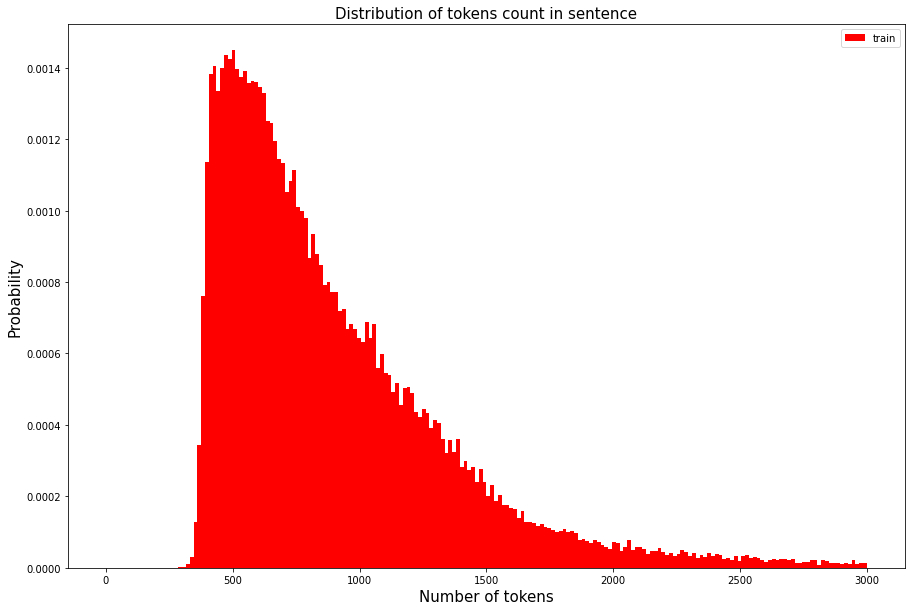

In [ ]:
print('문장 tokens 개수 최대 값: {}'.format(np.max(train_bert_token_counts)))
print('문장 tokens 개수 최소 값: {}'.format(np.min(train_bert_token_counts)))
print('문장 tokens 개수 평균 값: {:.2f}'.format(np.mean(train_bert_token_counts)))
print('문장 tokens 개수 표준편차: {:.2f}'.format(np.std(train_bert_token_counts)))
print('문장 tokens 개수 중간 값: {}'.format(np.median(train_bert_token_counts)))
print('문장 tokens 개수 제 1 사분위: {}'.format(np.percentile(train_bert_token_counts, 25)))
print('문장 tokens 개수 제 3 사분위: {}'.format(np.percentile(train_bert_token_counts, 75)))
print('문장 tokens 개수 99 퍼센트: {}'.format(np.percentile(train_bert_token_counts, 99)))

plt.figure(figsize=(15, 10))
plt.hist(train_bert_token_counts, bins=200, range=[0, 3000], facecolor='r', density=True, label='train')
plt.title('Distribution of tokens count in sentence', fontsize=15)
plt.legend()
plt.xlabel('Number of tokens', fontsize=15)
plt.ylabel('Probability', fontsize=15)

문장 단어 개수 최대 값: 8270
문장 단어 개수 최소 값: 5
문장 단어 개수 평균 값: 332.29
문장 단어 개수 표준편차: 218.81
문장 단어 개수 중간 값: 278.0
문장 단어 개수 제 1 사분위: 199.0
문장 단어 개수 제 3 사분위: 409.0
문장 단어 개수 99 퍼센트: 1136.25


Text(0, 0.5, 'Probability')

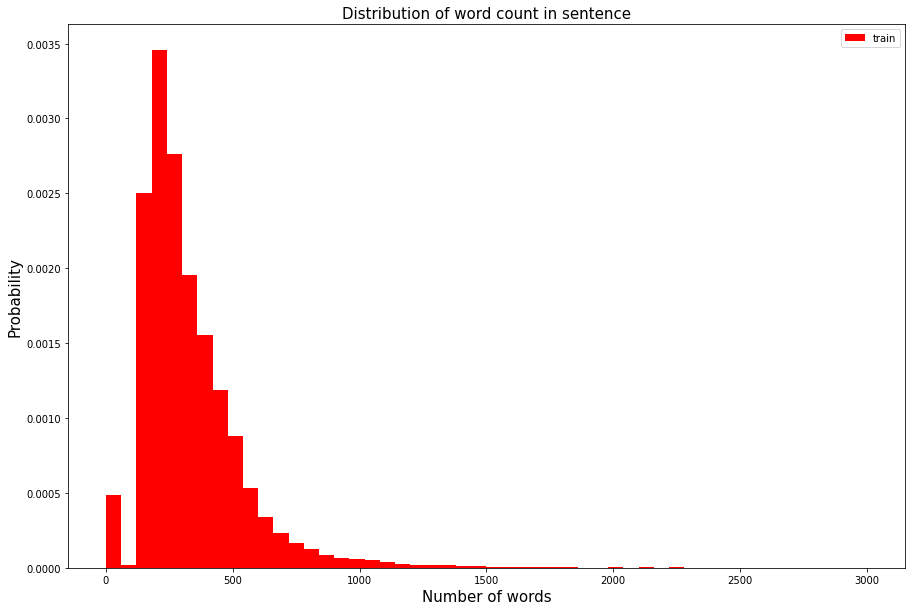

In [ ]:
train_word_counts = train_set.apply(lambda x:len(x.split(' ')))

print('문장 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('문장 단어 개수 최소 값: {}'.format(np.min(train_word_counts)))
print('문장 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('문장 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('문장 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
print('문장 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('문장 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))
print('문장 단어 개수 99 퍼센트: {}'.format(np.percentile(train_word_counts, 99)))

plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, range=[0, 3000], facecolor='r', density=True, label='train')
plt.title('Distribution of word count in sentence', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)